<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [2]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'data/bank_term_deposit_marketing_analysis.xlsx'

In [7]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [8]:
client_info = pd.read_excel(xls,'CLIENT_INFO')
loan_history=pd.read_excel(xls,'LOAN_HISTORY')
marketing_history=pd.read_excel(xls,'MARKETING HISTORY')
subscription_history=pd.read_excel(xls,'SUBSCRIPTION HISTORY')

In [9]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [10]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [11]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [12]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [13]:
df=pd.merge(client_info,loan_history,on=['ID'])
df=pd.merge(df,marketing_history,on=['ID'])
df=pd.merge(df,subscription_history,on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
df=df.drop(['ID'],axis=1)

### Task 4: Data Prep & Start H2O

In [15]:
import h2o
h2o.init(max_mem_size='10G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvkvw5c4w
  JVM stdout: /tmp/tmpvkvw5c4w/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmpvkvw5c4w/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,"2 years, 2 months and 22 days !!!"
H2O_cluster_name:,H2O_from_python_rhyme_up230u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,10 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [16]:
h2o_df=h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
 h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [18]:
train,test=h2o_df.split_frame(ratios=[.75])

x=train.columns
y='TERM_DEPOSIT'
x.remove(y)

### Task 5: Run H2O AutoML

In [19]:
from h2o.automl import H2OAutoML

In [20]:
df.TERM_DEPOSIT.value_counts()


no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [21]:
aml=H2OAutoML(max_runtime_secs=600,
             balance_classes=True,
              stopping_metric='logloss',
             project_name='Final',
             seed=1)
%time aml.train(x=x,y=y,training_frame=train)


AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 18s, sys: 976 ms, total: 1min 19s
Wall time: 10min 9s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [22]:
lb=aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20220805_090345,0.936126,0.219308,0.631528,0.174145,0.255397,0.0652275
XGBoost_grid__1_AutoML_20220805_090345_model_2,0.934767,0.198283,0.62181,0.166744,0.24975,0.0623748
StackedEnsemble_AllModels_AutoML_20220805_090345,0.931974,0.211219,0.624903,0.169861,0.253359,0.0641908
GBM_grid__1_AutoML_20220805_090345_model_2,0.931847,0.207616,0.61533,0.166473,0.255822,0.0654449
GBM_grid__1_AutoML_20220805_090345_model_1,0.931262,0.202009,0.605771,0.181579,0.252273,0.0636415
XGBoost_grid__1_AutoML_20220805_090345_model_5,0.930624,0.203963,0.608297,0.170131,0.251877,0.0634422
XGBoost_3_AutoML_20220805_090345,0.930175,0.204047,0.609595,0.166356,0.25217,0.0635897
XGBoost_grid__1_AutoML_20220805_090345_model_1,0.929443,0.206003,0.599812,0.17556,0.254446,0.0647426
GBM_2_AutoML_20220805_090345,0.928075,0.223339,0.602371,0.177001,0.265267,0.0703665
XGBoost_grid__1_AutoML_20220805_090345_model_4,0.927864,0.213856,0.596487,0.180003,0.258256,0.0666962


In [23]:
se=aml.leader
metalearner=h2o.get_model(se.metalearner()['name'])


In [25]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20220805_090345_model_2',
  0.8814507093573454,
  1.0,
  0.5983507852829806),
 ('GBM_grid__1_AutoML_20220805_090345_model_2',
  0.440671262697481,
  0.4999386330050933,
  0.2991386736518974),
 ('DeepLearning_grid__2_AutoML_20220805_090345_model_1',
  0.13601923869051527,
  0.15431292668615038,
  0.09233326086197309),
 ('DRF_1_AutoML_20220805_090345',
  0.0149807160957653,
  0.016995523330723225,
  0.01016928473123346),
 ('GLM_1_AutoML_20220805_090345',
  1.177839916785662e-05,
  1.3362515955593368e-05,
  7.99547191538565e-06),
 ('XRT_1_AutoML_20220805_090345', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [26]:
model=h2o.get_model('XGBoost_grid__1_AutoML_20220805_090345_model_2')

In [27]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06202371810892835
RMSE: 0.24904561451454701
LogLoss: 0.19853119848782036
Mean Per-Class Error: 0.13015123120445593
AUC: 0.9347461791260913
AUCPR: 0.6356543203695815
Gini: 0.8694923582521825

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2871092677116394: 


,,no,yes,Error,Rate
0,no,9137.0,751.0,0.076,(751.0/9888.0)
1,yes,361.0,962.0,0.2729,(361.0/1323.0)
2,Total,9498.0,1713.0,0.0992,(1112.0/11211.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.287109,0.633729,213.0
1,max f2,0.128373,0.739290,288.0
2,max f0point5,0.444907,0.627706,153.0
3,max accuracy,0.444907,0.912051,153.0
4,max precision,0.893553,0.880734,20.0
5,max recall,0.000655,1.000000,398.0
6,max specificity,0.987414,0.999899,0.0
7,max absolute_mcc,0.287109,0.583907,213.0
8,max min_per_class_accuracy,0.143717,0.863190,280.0
9,max mean_per_class_accuracy,0.101174,0.869849,304.0



Gains/Lift Table: Avg response rate: 11.80 %, avg score: 11.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010079,0.885839,7.424056,7.424056,0.876106,0.927842,0.876106,0.927842,0.074830,0.074830,642.405635,642.405635
1,,2,0.020070,0.810718,5.977142,6.703815,0.705357,0.846219,0.791111,0.887212,0.059713,0.134543,497.714205,570.381456
2,,3,0.030060,0.743200,6.204122,6.537745,0.732143,0.775655,0.771513,0.850137,0.061980,0.196523,520.412213,553.774467
3,,4,0.040050,0.689285,5.825822,6.360160,0.687500,0.712637,0.750557,0.815838,0.058201,0.254724,482.582200,536.016040
4,,5,0.050040,0.640926,5.296202,6.147748,0.625000,0.664415,0.725490,0.785608,0.052910,0.307634,429.620181,514.774799
5,,6,0.100080,0.441075,4.833610,5.490679,0.570410,0.531285,0.647950,0.658446,0.241875,0.549509,383.361021,449.067910
6,,7,0.150031,0.292835,3.344173,4.776028,0.394643,0.365008,0.563615,0.560750,0.167045,0.716553,234.417315,377.602789
7,,8,0.200071,0.178394,2.190230,4.129290,0.258467,0.232684,0.487294,0.478697,0.109599,0.826153,119.022963,312.929012
8,,9,0.300062,0.067055,1.186803,3.148753,0.140054,0.112988,0.371581,0.356830,0.118670,0.944822,18.680276,214.875256
9,,10,0.400054,0.031050,0.332607,2.444873,0.039251,0.046015,0.288517,0.279144,0.033258,0.978080,-66.739286,144.487319


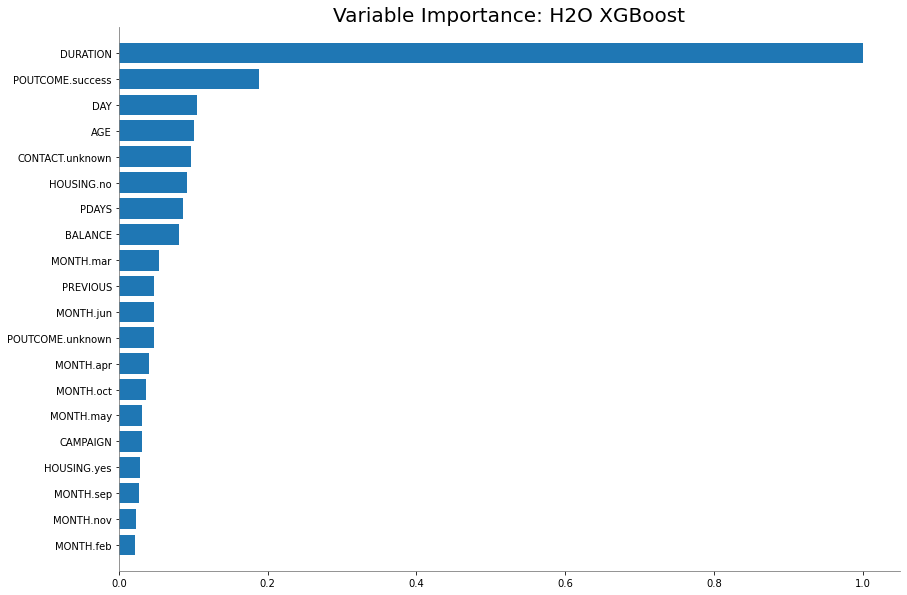

In [30]:
model.varimp_plot(num_of_features=20)

In [29]:
model.varimp_plot?

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20220805_090345_model_2


Model Summary: 


,,number_of_trees
0,,72.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.049948760818305356
RMSE: 0.223492194088083
LogLoss: 0.16327918245991585
Mean Per-Class Error: 0.10474974051093078
AUC: 0.9586178444728518
AUCPR: 0.764621015179859
Gini: 0.9172356889457036

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34051688297374827: 


,,no,yes,Error,Rate
0,no,28430.0,1604.0,0.0534,(1604.0/30034.0)
1,yes,990.0,2976.0,0.2496,(990.0/3966.0)
2,Total,29420.0,4580.0,0.0763,(2594.0/34000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.340517,0.696466,201.0
1,max f2,0.161803,0.783587,276.0
2,max f0point5,0.508399,0.723050,140.0
3,max accuracy,0.465845,0.930529,154.0
4,max precision,0.988788,1.000000,0.0
5,max recall,0.001340,1.000000,396.0
6,max specificity,0.988788,1.000000,0.0
7,max absolute_mcc,0.276209,0.656105,226.0
8,max min_per_class_accuracy,0.177613,0.892587,268.0
9,max mean_per_class_accuracy,0.161803,0.895250,276.0



Gains/Lift Table: Avg response rate: 11.66 %, avg score: 11.67 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.881904,8.270298,8.270298,0.964706,0.924315,0.964706,0.924315,0.082703,0.082703,727.029753,727.029753
1,,2,0.02,0.817238,7.917297,8.093797,0.923529,0.848344,0.944118,0.886329,0.079173,0.161876,691.729702,709.379728
2,,3,0.03,0.752146,7.085224,7.757606,0.826471,0.783461,0.904902,0.852040,0.070852,0.232728,608.522441,675.760632
3,,4,0.04,0.695754,6.908724,7.545386,0.805882,0.722088,0.880147,0.819552,0.069087,0.301815,590.872416,654.538578
4,,5,0.05,0.650137,6.883510,7.413011,0.802941,0.671938,0.864706,0.790029,0.068835,0.370651,588.350983,641.301059
5,,6,0.10,0.449506,5.179022,6.296016,0.604118,0.545919,0.734412,0.667974,0.258951,0.629602,417.902168,529.601614
6,,7,0.15,0.292658,3.287948,5.293327,0.383529,0.369735,0.617451,0.568561,0.164397,0.793999,228.794755,429.332661
7,,8,0.20,0.174357,2.022189,4.475542,0.235882,0.228120,0.522059,0.483451,0.101109,0.895108,102.218860,347.554211
8,,9,0.30,0.066602,0.761473,3.237519,0.088824,0.110274,0.377647,0.359058,0.076147,0.971256,-23.852748,223.751891
9,,10,0.40,0.030801,0.214322,2.481720,0.025000,0.045681,0.289485,0.280714,0.021432,0.992688,-78.567827,148.171962




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.06237484701529724
RMSE: 0.24974956859882108
LogLoss: 0.1982834550557071
Mean Per-Class Error: 0.129410562801056
AUC: 0.9347671395178926
AUCPR: 0.621810208107756
Gini: 0.8695342790357852

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2567092776298523: 


,,no,yes,Error,Rate
0,no,27553.0,2481.0,0.0826,(2481.0/30034.0)
1,yes,995.0,2971.0,0.2509,(995.0/3966.0)
2,Total,28548.0,5452.0,0.1022,(3476.0/34000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.256709,0.630920,232.0
1,max f2,0.116541,0.736649,296.0
2,max f0point5,0.433067,0.604622,166.0
3,max accuracy,0.463022,0.908382,156.0
4,max precision,0.827068,0.814262,38.0
5,max recall,0.000746,1.000000,397.0
6,max specificity,0.987315,0.999967,0.0
7,max absolute_mcc,0.256709,0.583075,232.0
8,max min_per_class_accuracy,0.140796,0.864520,284.0
9,max mean_per_class_accuracy,0.087691,0.870589,311.0



Gains/Lift Table: Avg response rate: 11.66 %, avg score: 11.55 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.879425,6.732224,6.732224,0.785294,0.923602,0.785294,0.923602,0.067322,0.067322,573.222390,573.222390
1,,2,0.02,0.805023,7.110439,6.921331,0.829412,0.844439,0.807353,0.884021,0.071104,0.138427,611.043873,592.133132
2,,3,0.03,0.739843,5.925366,6.589343,0.691176,0.768385,0.768627,0.845475,0.059254,0.197680,492.536561,558.934275
3,,4,0.04,0.689143,5.874937,6.410741,0.685294,0.713976,0.747794,0.812601,0.058749,0.256430,487.493696,541.074130
4,,5,0.05,0.637456,5.017650,6.132123,0.585294,0.662570,0.715294,0.782595,0.050177,0.306606,401.765003,513.212305
5,,6,0.10,0.450265,4.548664,5.340393,0.530588,0.538755,0.622941,0.660675,0.227433,0.534039,354.866364,434.039334
6,,7,0.15,0.287781,3.686334,4.789040,0.430000,0.364975,0.558627,0.562108,0.184317,0.718356,268.633384,378.904017
7,,8,0.20,0.171439,2.274332,4.160363,0.265294,0.223780,0.485294,0.477526,0.113717,0.832073,127.433182,316.036309
8,,9,0.30,0.065690,1.157337,3.159355,0.135000,0.108844,0.368529,0.354632,0.115734,0.947806,15.733737,215.935451
9,,10,0.40,0.030983,0.315179,2.448311,0.036765,0.045478,0.285588,0.277344,0.031518,0.979324,-68.482098,144.831064




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8997059,0.0048339646,0.9005882,0.8917647,0.905,0.9007353,0.90044117
1,auc,0.9348871,0.0031719538,0.9343781,0.9303352,0.93396175,0.9383763,0.93738425
2,aucpr,0.6232499,0.018035019,0.61254907,0.6083338,0.61557305,0.6266513,0.65314215
3,err,0.10029412,0.0048339646,0.09941176,0.10823529,0.095,0.0992647,0.09955882
4,err_count,682.0,32.87096,676.0,736.0,646.0,675.0,677.0
5,f0point5,0.5821121,0.011595254,0.5892157,0.565632,0.58532387,0.5755396,0.5948491
6,f1,0.6332598,0.009916883,0.6400426,0.62178826,0.627451,0.63054186,0.6464752
7,f2,0.69439685,0.012022258,0.7004662,0.69032407,0.67611235,0.69716775,0.707914
8,lift_top_group,6.920683,0.6989939,6.3432837,6.034483,7.3394494,7.6822915,7.203907
9,logloss,0.19828345,0.0070358193,0.20085387,0.20890969,0.19468613,0.19036348,0.1966041



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-08-05 09:08:02,53.256 sec,0.0,0.500000,0.693147,0.500000,0.116647,1.000000,0.883353
1,,2022-08-05 09:08:03,53.925 sec,5.0,0.276067,0.285142,0.911296,0.600723,7.235597,0.106500
2,,2022-08-05 09:08:03,54.318 sec,10.0,0.255375,0.226736,0.926651,0.631807,7.362291,0.103176
3,,2022-08-05 09:08:03,54.641 sec,15.0,0.249163,0.207492,0.933454,0.648655,7.513868,0.099324
4,,2022-08-05 09:08:04,54.860 sec,20.0,0.244536,0.196711,0.938973,0.666587,7.589511,0.090059
5,,2022-08-05 09:08:04,55.092 sec,25.0,0.241830,0.191204,0.942162,0.678380,7.690368,0.090382
6,,2022-08-05 09:08:04,55.326 sec,30.0,0.239227,0.186647,0.944791,0.690469,7.841654,0.090706
7,,2022-08-05 09:08:04,55.566 sec,35.0,0.236449,0.182026,0.947628,0.702256,7.841654,0.089971
8,,2022-08-05 09:08:05,55.804 sec,40.0,0.234130,0.178107,0.949883,0.712981,7.917297,0.089647
9,,2022-08-05 09:08:05,56.053 sec,45.0,0.232896,0.176144,0.950970,0.718937,8.018154,0.087941



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DURATION,10075.869141,1.000000,0.423500
1,POUTCOME.success,1896.375122,0.188210,0.079707
2,DAY,1059.076660,0.105110,0.044514
3,AGE,1016.356750,0.100870,0.042719
4,CONTACT.unknown,983.898804,0.097649,0.041354
5,HOUSING.no,916.754333,0.090985,0.038532
6,PDAYS,873.903564,0.086732,0.036731
7,BALANCE,818.391357,0.081223,0.034398
8,MONTH.mar,550.502136,0.054636,0.023138
9,PREVIOUS,480.213379,0.047660,0.020184



See the whole table with table.as_data_frame()


Signature: model.varimp_plot(num_of_features=None, server=False)
Docstring:
Plot the variable importance for a trained model.

:param num_of_features: the number of features shown in the plot (default is 10 or all if less than 10).
:param server: ?

:returns: None.
File:      ~/.local/lib/python3.6/site-packages/h2o/model/model_base.py
Type:      method
